<a href="https://colab.research.google.com/github/John260260/ANN-for-regression-and-Classification/blob/main/hourly_power_pred_regress_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd 
import tensorflow as tf

In [4]:
tf.__version__

'2.7.0'

In [6]:
dataset=pd.read_csv('/content/drive/MyDrive/datasets/Folds5x2_pp - Sheet1.csv')

In [7]:
x=dataset.iloc[:, :-1].values
y=dataset.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
ann=tf.keras.Sequential()

In [13]:
ann.add(tf.keras.layers.Dense(6,activation='relu'))
ann.add(tf.keras.layers.Dense(6,activation='relu'))
ann.add(tf.keras.layers.Dense(1))

ann.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
ann.fit(x_train,y_train, batch_size=32, epochs=100)

Epoch 1/100
240/240 [==============================] - 1s 2ms/step - loss: 154781.3281
Epoch 2/100
240/240 [==============================] - 0s 2ms/step - loss: 148.6602
Epoch 3/100
240/240 [==============================] - 0s 2ms/step - loss: 141.8647
Epoch 4/100
240/240 [==============================] - 0s 2ms/step - loss: 136.4454
Epoch 5/100
240/240 [==============================] - 0s 2ms/step - loss: 130.5870
Epoch 6/100
240/240 [==============================] - 0s 2ms/step - loss: 124.3203
Epoch 7/100
240/240 [==============================] - 0s 2ms/step - loss: 117.5986
Epoch 8/100
240/240 [==============================] - 0s 2ms/step - loss: 110.6529
Epoch 9/100
240/240 [==============================] - 0s 2ms/step - loss: 103.7645
Epoch 10/100
240/240 [==============================] - 0s 2ms/step - loss: 97.9665
Epoch 11/100
240/240 [==============================] - 0s 2ms/step - loss: 91.3942
Epoch 12/100
240/240 [==============================] - 0s 2ms/step - los

In [28]:
y_pred=ann.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.44 431.23]
 [460.26 460.01]
 [465.89 461.14]
 ...
 [472.54 473.26]
 [437.79 438.  ]
 [457.93 463.28]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


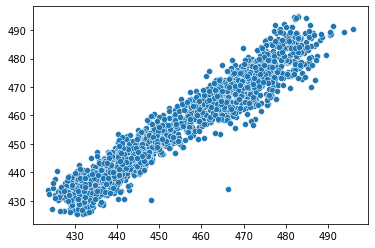

In [49]:
import seaborn as sns
sns.scatterplot(y_pred.flatten(),y_test.flatten())


In [51]:
a=y_pred.flatten()-y_test.flatten()

In [59]:
loss=pd.DataFrame(data=a)


In [62]:
loss.shape

(1914, 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


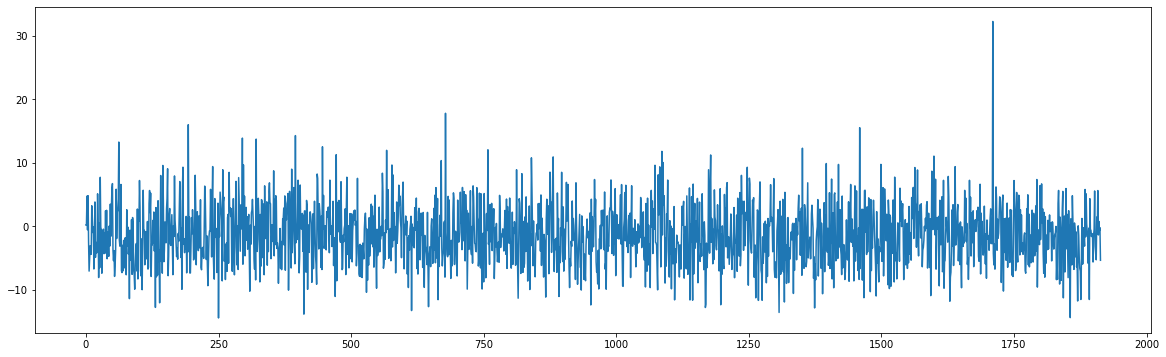

In [63]:
plt.figure(figsize=(20,6))
sns.lineplot(loss[0].index,loss[0].values)